# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/listings.csv.gz", low_memory=False)

print("Filas y columnas:", df.shape)

df.head()


Filas y columnas: (18927, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20250612050654,2025-06-21,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.60,4.81,4.28,HUTB-002062,t,28,28,0,0,0.33
1,23197,https://www.airbnb.com/rooms/23197,20250612050654,2025-06-23,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.65,4.68,HUTB005057,f,1,1,0,0,0.51
2,32711,https://www.airbnb.com/rooms/32711,20250612050654,2025-06-22,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.89,4.89,4.47,HUTB-001722,f,3,3,0,0,0.87
3,34241,https://www.airbnb.com/rooms/34241,20250612050654,2025-06-22,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,...,4.68,4.73,4.23,Exempt,f,3,3,0,0,0.14
4,347824,https://www.airbnb.com/rooms/347824,20250612050654,2025-06-22,city scrape,"Ideal Happy Location Barceloneta Beach, Old Town!",Please send us a message to confirm availabili...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1447144,...,3.67,5.00,4.00,HUTB-076700,f,355,355,0,0,0.02


## 2. Explore Missing Values

Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



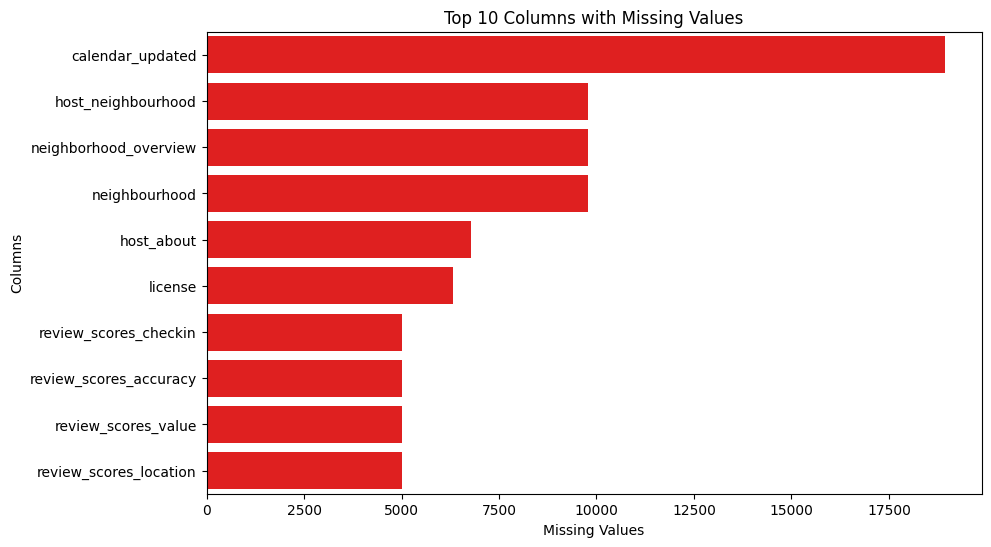

In [3]:
# Count nulls per column
missing = df.isna().sum().sort_values(ascending=False)

# Show top 15 columns with most missing values
missing.head(15)

# Visualize top 10 columns with missing values
plt.figure(figsize=(10,6))
sns.barplot(x=missing.head(10).values, y=missing.head(10).index, color="red")
plt.title("Top 10 Columns with Missing Values")
plt.xlabel("Missing Values")
plt.ylabel("Columns")
plt.show()


1. The top 3 columns with the most missing values are: calendar_updated, host_neighbourhood, neighborhood_overview.  
2. Columns like review_scores_* could create business issues because they are important for host/guest trust.  
3. Columns such as license or host_about could be safely ignored/dropped since they don’t affect pricing or availability.


## 3. Drop Columns That Aren’t Useful

Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [4]:
# Drop selected columns
cols_to_drop = ['calendar_updated', 'host_about', 'license', 'neighborhood_overview']
df = df.drop(columns=cols_to_drop)

# Confirm they are gone
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18927 non-null  int64  
 1   listing_url                                   18927 non-null  object 
 2   scrape_id                                     18927 non-null  int64  
 3   last_scraped                                  18927 non-null  object 
 4   source                                        18927 non-null  object 
 5   name                                          18927 non-null  object 
 6   description                                   18189 non-null  object 
 7   picture_url                                   18927 non-null  object 
 8   host_id                                       18927 non-null  int64  
 9   host_url                                      18927 non-null 

1. Dropped columns: calendar_updated, host_about, license, neighborhood_overview.  
2. They were not useful because they had too many missing values or were descriptive/free text with little business value.  
3. If kept, they could add noise and make the dataset harder to analyze without improving decision-making.  



## 4. Fill or Fix Values in Key Columns

Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [5]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())

df['host_neighbourhood'] = df['host_neighbourhood'].fillna("Unknown")

df[['review_scores_rating', 'host_neighbourhood']].isna().sum()


,0
review_scores_rating,0
host_neighbourhood,0


1. Cleaned columns: review_scores_rating, host_neighbourhood  
2. Methods: median for review_scores_rating, "Unknown" for host_neighbourhood  
3. Risks: imputation may distort true score distribution, and "Unknown" may group different missing cases together


## 5. Convert and Clean Data Types

Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [7]:
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

df['price'].describe()


,price
count,14913.000000
mean,214.380071
std,385.402591
min,9.000000
25%,74.000000
50%,143.000000
75%,256.000000
max,10000.000000


1. Fixed column: price  
2. Cleaning steps: removed dollar signs and commas, converted to float  
3. This prepares the data for calculations, aggregations, and visualizations without errors  


## 6. Remove Duplicate Records

Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [8]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

df = df.drop_duplicates()

id_duplicates = df['id'].duplicated().sum()
print("Number of duplicate IDs:", id_duplicates)

Number of duplicate rows: 0
Number of duplicate IDs: 0


1. Found 0 duplicate rows and 0 duplicate IDs.  
2. No need to drop records since all listings are already unique.  
3. Duplicates are risky because they could inflate revenue estimates and mislead Airbnb teams about supply and demand.  

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [9]:
df.to_csv("cleaned_airbnb_data.csv", index=False)

print("Cleaned dataset saved as cleaned_airbnb_data.csv")

Cleaned dataset saved as cleaned_airbnb_data.csv


## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


1. The most challenging part was dealing with missing values because some columns had too many nulls.  
2. I decided what to drop, fix, or keep based on how useful the column would be for business analysis.  
3. A business team like pricing analysts could use the cleaned data to better understand market trends.  
4. If I had more time, I would explore outliers in price and availability to improve data quality further.  
5. This relates to my customized learning outcome by giving me hands-on practice with real data cleaning tasks.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [10]:
!jupyter nbconvert --to html "assignment_06_FajardoPatrick.ipynb"

[NbConvertApp] Converting notebook assignment_06_FajardoPatrick.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 374185 bytes to assignment_06_FajardoPatrick.html
